# 시계열(Time Series) 분석
* 시계열 자료(time series)
    * 년도별 계절별 월별 일별 시 분 초별로 시간의 흐름에 따라 관측된 자료
* 시계열자료의 분석 목적:
    * 1) (forecast) 미래에 대한 예측
    * 2) 시스템 또는 확률과정의 이해와 제어(control)

# datetime 오브젝트
* 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
* 날짜를 처리하는 date 오브젝트
* 시간을 처리하는 time 오브젝트
* 날짜와 시간을 처리하는 datetime 오브젝트가 포함되어 있다.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import xlrd
import warnings
from datetime import datetime
from numpy import NaN, NAN, nan
warnings.filterwarnings(action = 'ignore')
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family=font_name)

In [3]:
#from 모듈 이름  import 모듈 함수
from datetime import datetime

In [4]:
now1 = datetime.now()
print(now1)

2023-06-19 14:06:12.728094


In [5]:
now2 = datetime.today()
print(now2)

2023-06-19 14:06:27.251544


In [7]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2023-06-19 14:07:55.953249
1970-01-01 00:00:00
1970-12-12 13:24:34


In [8]:
#날짜와 날짜 사이의 간격
# datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다.
diff1 = t1 - t2
print(diff1)
print(type(diff1))

19527 days, 14:07:55.953249
<class 'datetime.timedelta'>


In [9]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-19528 days, 9:52:04.046751
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환하기
- 시계열 데이터를 문자열로 저장 --> 시간 계산을 할 수 없기 때문에 datetime오브젝트로 변환해야함

- to_datetime 메서드를 사용해서 datetime 타입으로 변환

In [11]:
ebola = pd.read_csv('../data/country_timeseries.csv')

In [22]:
print(ebola.info())
# date 타입이 오브젝트로 되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [23]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [26]:
test_df1 = pd.DataFrame({'order_day' : ['01/01/15', '02/01/15', '03/01/15','05/08/25']})
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')  #3번째에 있는걸 year로 적용
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y')  #3번째에 있는걸 year로 적용
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d')  #1번째에 있는걸 year로 적용
test_df1['date_dt4'] = pd.to_datetime(test_df1['order_day'], format = '%m/%y/%d')  #2번째에 있는걸 year로 적용

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3   date_dt4
0  01/01/15 2015-01-01 2015-01-01 2001-01-15 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15 2001-02-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15 2001-03-15
3  05/08/25 2025-08-05 2025-05-08 2005-08-25 2008-05-25


In [27]:
test_df2 = pd.DataFrame({'order_day' : ['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


# 시계열 데이터를 구분해서 추출

In [28]:
# now는 정밀한 시간 단위까지 표현 가능

now = datetime.now()
print(now)

2023-06-19 14:27:11.298970


In [41]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)
print(type(nowDate))

2023-06-19
<class 'str'>


In [34]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

14:27:11


In [43]:
nowTime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowTime)

2023-06-19 14:27:11


In [45]:
nowTime = now.strftime('%Y-%m-%d %H:%M:%S %A %a %b %B')
print(nowTime)

2023-06-19 14:27:11 Monday Mon Jun June


# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

- 위에서는 to_datetime 메서드를 사용하여 문자열로 저장된 date열을 datetime 오브젝트로 변환
- parse_dates 옵션을 부여하여 문자열을 datetime으로 불러올 수 있다.

In [47]:
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates = ['Date'])
print(ebola.info())

# 데이터를 불러올 때 parse_dates를 사용해서 데이터타입을 바로 변경, 적용해 올 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# datetime 오브젝트에서 날짜 정보 추출하기
- datetime 오브젝트에서 년, 월, 일과 같은 날짜 정보가 따로 저장되지 않습니다.
- dateimte 오브젝트에서 날짜 정보를 추출

In [49]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [50]:
print(d1[0].year)

2018


In [51]:
print(d1[0].day)

16


In [52]:
print(d1[0].month)

5


# dt 접근자로 시계열 데이터 정리하기
- datetime 오브젝트는 dt접근자를 사용하면 datetime 속성이나 메소드를 사용하여 시계열 데이터를 처리할 수 있음

In [53]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [61]:
print(ebola['date_dt'][3].year)

2015


In [55]:
print(ebola['date_dt'][3].month)

1


In [58]:
# dt접근자로 date_dt 열에 접근한 다음 year속성을 이용

ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [59]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


# 에볼라 최초 발병일 계산하기

In [62]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [65]:
print(ebola['date_dt'].min())
print(ebola['date_dt'].max())

print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
2015-01-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [70]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [71]:
ebola[ebola['date_dt'] == ebola['date_dt'].min()]

# 에볼라의 최초 발병일이 일어난 행

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day,outbreak_d
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2014-03-22,2014,3,22,0 days


# 파산한 은행의 개수 확인하기

In [73]:
banks = pd.read_csv('../data/banklist.csv')
print(banks.head())
print(banks.info())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column  

In [74]:
banks = pd.read_csv('../data/banklist.csv', parse_dates = [5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [78]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


In [77]:
# groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있다.

closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [80]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

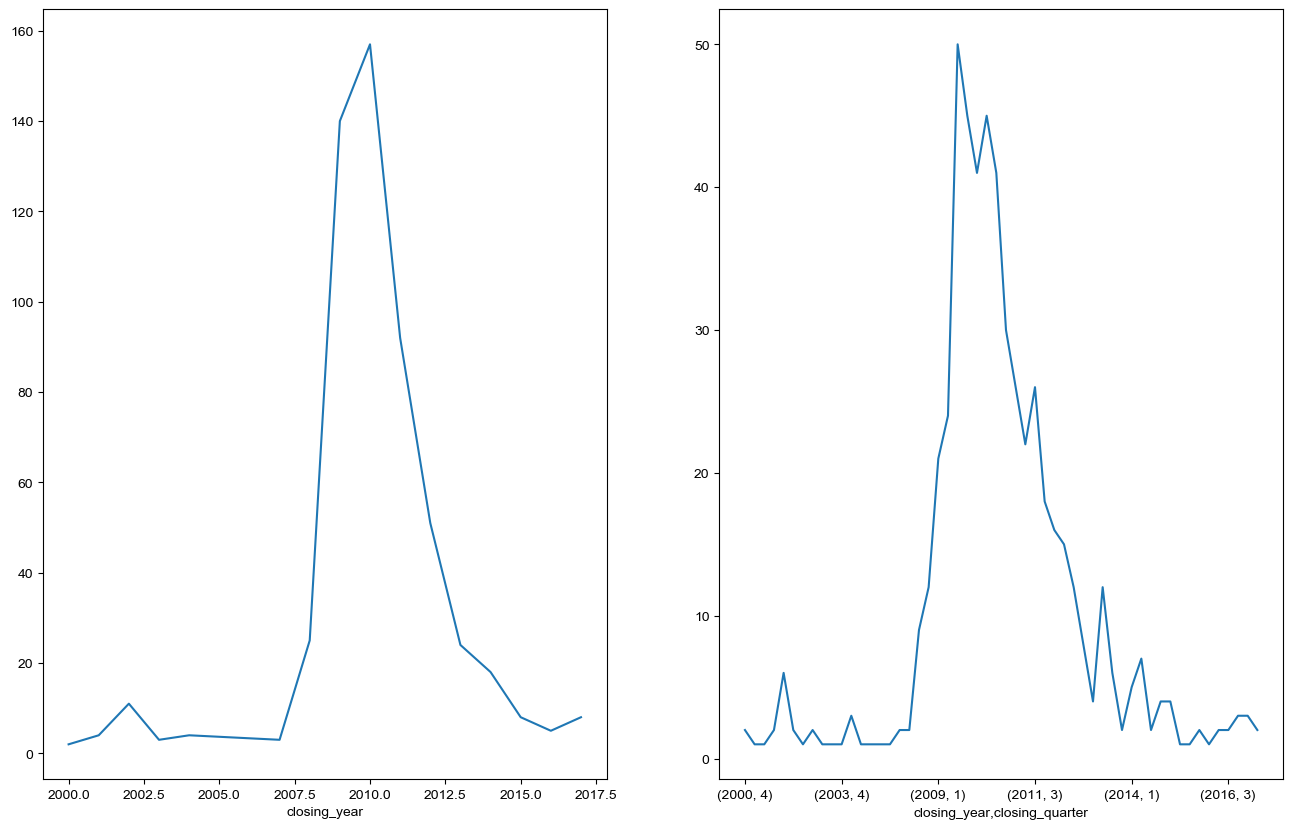

In [93]:
fig, ax = plt.subplots(1,2, figsize = (16,10))
closing_year.plot(ax = ax[0])
closing_year_q.plot(ax = ax[1])
plt.show()